In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
file_path = "C:/Users/ammur/Downloads/archive (3)/bank.csv"
data = pd.read_csv(file_path)


In [12]:
# Basic data information
print("Dataset shape:", data.shape)
print("\nDataset info:")
data.info()

Dataset shape: (11162, 17)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [13]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [14]:
# Statistical summary of numerical features
print("\nStatistical summary of numerical features:")
print(data.describe())


Statistical summary of numerical features:
                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.0

In [15]:
# Unique values in each column
print("\nUnique values in each column:")
for column in data.columns:
    print(f"{column}: {data[column].nunique()} unique values")


Unique values in each column:
age: 76 unique values
job: 12 unique values
marital: 3 unique values
education: 4 unique values
default: 2 unique values
balance: 3805 unique values
housing: 2 unique values
loan: 2 unique values
contact: 3 unique values
day: 31 unique values
month: 12 unique values
duration: 1428 unique values
campaign: 36 unique values
pdays: 472 unique values
previous: 34 unique values
poutcome: 4 unique values
deposit: 2 unique values


In [16]:
df = pd.read_csv(file_path)

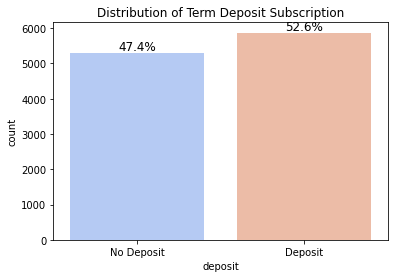

In [17]:
# 1. Distribution of Deposit Subscription with percentages
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='deposit', data=df, palette='coolwarm')

# Calculate percentages
total = len(df['deposit'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), percentage, 
            ha='center', va='bottom', fontsize=12)

# Set the title and labels
plt.title('Distribution of Term Deposit Subscription')
plt.xticks([0, 1], ['No Deposit', 'Deposit'])
plt.show()

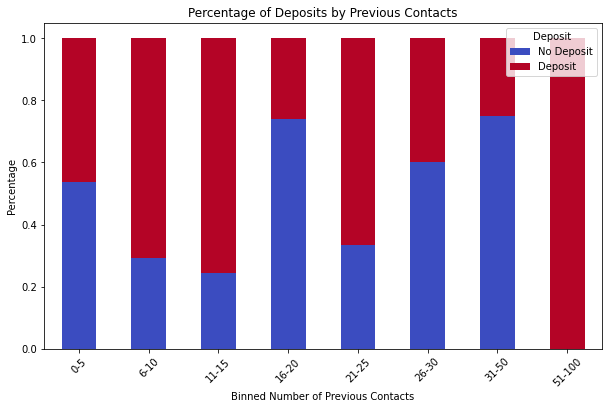

In [18]:
# Binning the 'previous' contacts into categories (0-5, 6-10, 11-15, etc.)
bins = [0, 5, 10, 15, 20, 25, 30, 50, 100]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-50', '51-100']
df['previous_binned'] = pd.cut(df['previous'], bins=bins, labels=labels, right=False)

# Calculate the percentage of deposits for each bin
grouped = df.groupby(['previous_binned', 'deposit']).size().unstack(fill_value=0)
percentage_grouped = grouped.div(grouped.sum(axis=1), axis=0)

# Create a percentage plot
percentage_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')

# Set plot details
plt.title('Percentage of Deposits by Previous Contacts')
plt.xlabel('Binned Number of Previous Contacts')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Deposit', labels=['No Deposit', 'Deposit'])
plt.show()

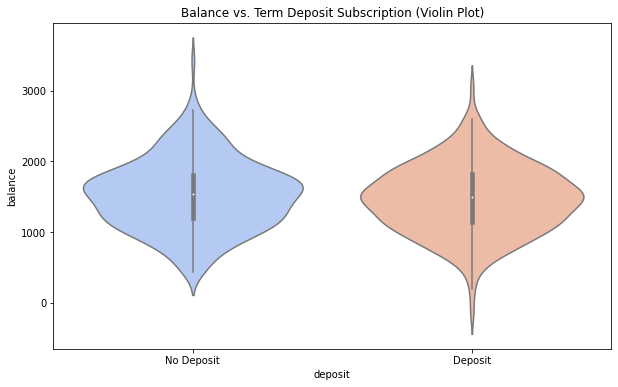

In [19]:
# 4. Balance vs. Deposit Subscription
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
np.random.seed(42)
df_sample = pd.DataFrame({
    'balance': np.random.randn(500) * 500 + 1500,  # Random balance data
    'deposit': np.random.choice([0, 1], size=500)  # Random deposit subscription (0 for No, 1 for Yes)
})

plt.figure(figsize=(10, 6))
sns.violinplot(x='deposit', y='balance', data=df_sample, palette='coolwarm')
plt.title('Balance vs. Term Deposit Subscription (Violin Plot)')
plt.xticks([0, 1], ['No Deposit', 'Deposit'])
plt.show()

In [22]:
print(data.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


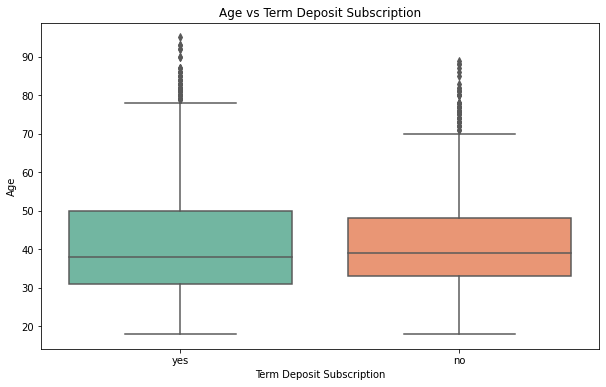

In [23]:
# Age vs Term Deposit Subscription
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='deposit', y='age', palette='Set2')
plt.title('Age vs Term Deposit Subscription')
plt.xlabel('Term Deposit Subscription')
plt.ylabel('Age')
plt.show()


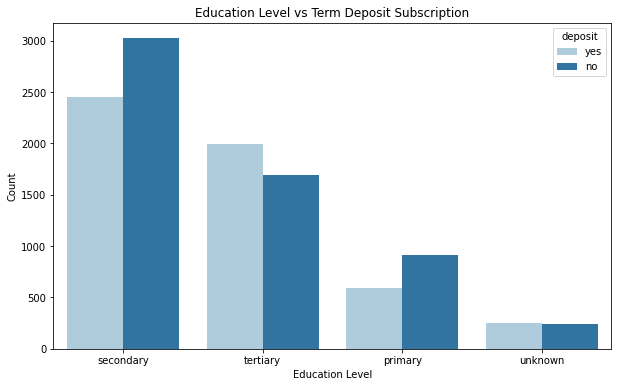

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='education', hue='deposit', palette='Paired')
plt.title('Education Level vs Term Deposit Subscription')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


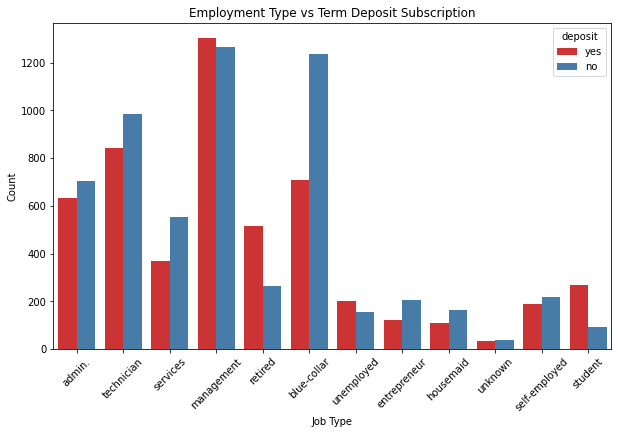

In [28]:
# Employment Type vs Term Deposit Subscription
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='job', hue='deposit', palette='Set1')
plt.title('Employment Type vs Term Deposit Subscription')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


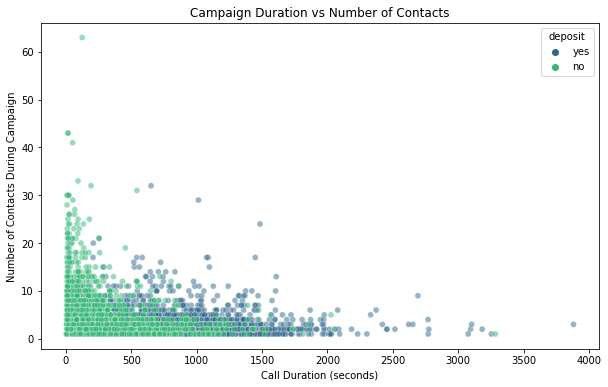

In [29]:
# Campaign Duration vs Term Deposit Subscription
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='duration', y='campaign', hue='deposit', palette='viridis', alpha=0.5)
plt.title('Campaign Duration vs Number of Contacts')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Number of Contacts During Campaign')
plt.show()


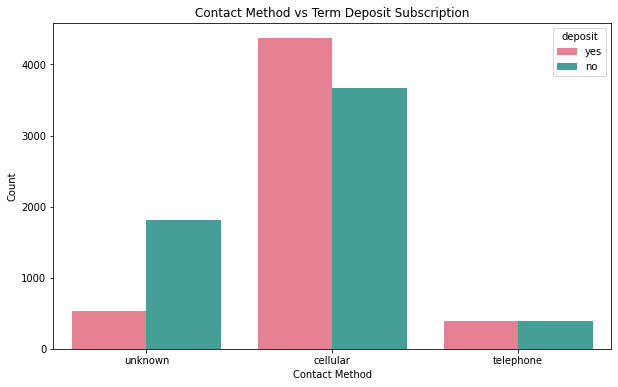

In [30]:
# Contact Medium vs Term Deposit Subscription
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='contact', hue='deposit', palette='husl')
plt.title('Contact Method vs Term Deposit Subscription')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.show()


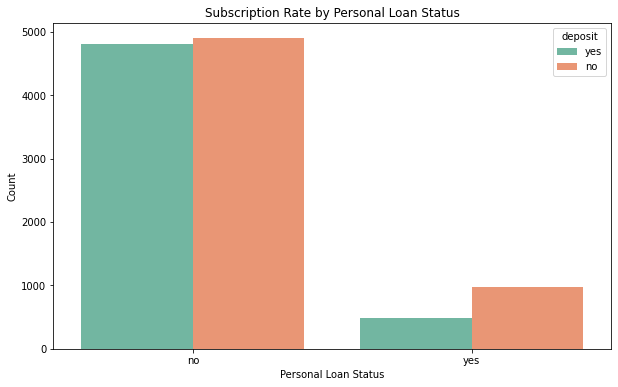

In [31]:
# Subscription Rate by Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='loan', hue='deposit', palette='Set2')
plt.title('Subscription Rate by Personal Loan Status')
plt.xlabel('Personal Loan Status')
plt.ylabel('Count')
plt.show()


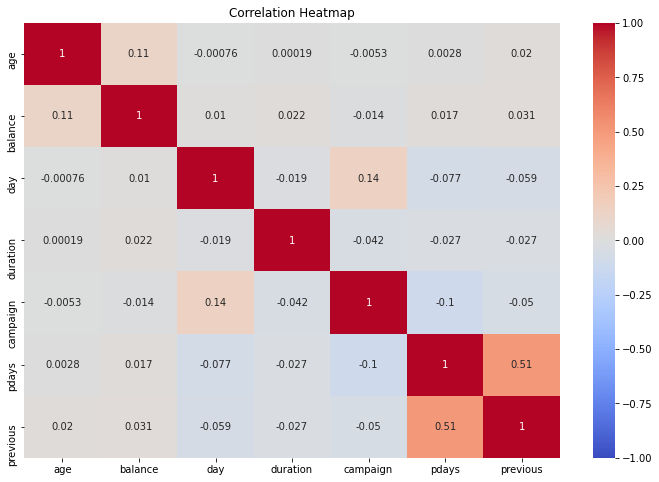

In [32]:
# Select only numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


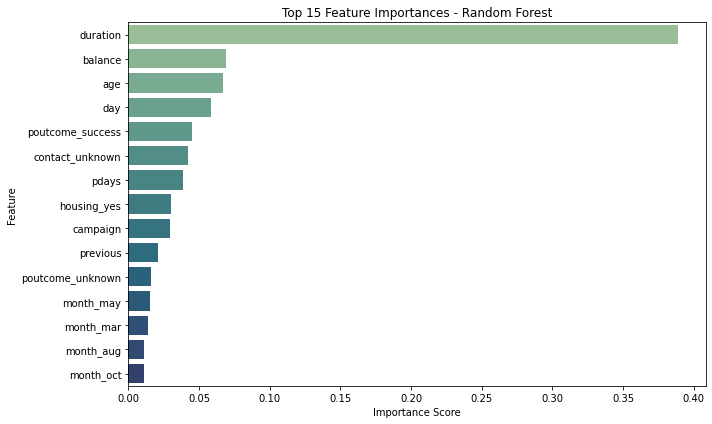

In [37]:
# 🚨 Make sure you’ve already preprocessed the dataset:
# - data = cleaned and encoded DataFrame
# - 'deposit' is your target (already mapped as 1/0)
# - X and y are defined

# If not already done:
X = data.drop('deposit', axis=1)
y = data['deposit']
X = pd.get_dummies(X, drop_first=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 2: Define param grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True]
}

# Step 3: Initialize and tune model
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    scoring='accuracy'
)

# Step 4: Sample tuning data to speed up (optional)
X_sample, _, y_sample, _ = train_test_split(
    X_train, y_train, train_size=0.5, random_state=42
)
random_search.fit(X_sample, y_sample)

# Step 5: Train best model on full training data
best_rf_model = random_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# ✅ Now you can safely do Feature Importance!
importances = best_rf_model.feature_importances_
features = X.columns

# Top 15 important features
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df, x='Importance', y='Feature', palette='crest')
plt.title('Top 15 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


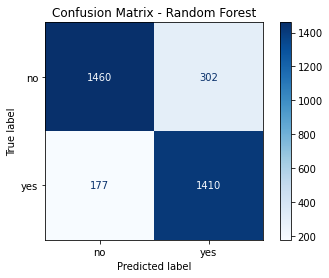

Classification Report:

              precision    recall  f1-score   support

          no       0.89      0.83      0.86      1762
         yes       0.82      0.89      0.85      1587

    accuracy                           0.86      3349
   macro avg       0.86      0.86      0.86      3349
weighted avg       0.86      0.86      0.86      3349



In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Predict on the test data
y_pred = best_rf_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Optional: Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


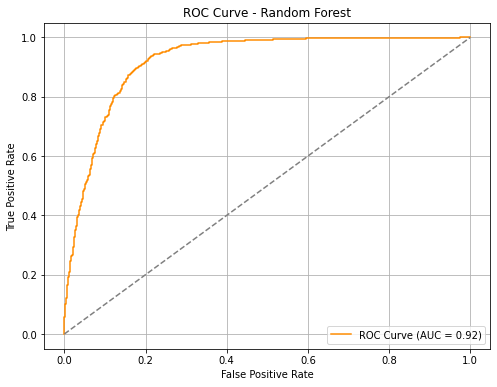

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

# Convert target to numeric (if needed)
y_test_binary = y_test.map({'no': 0, 'yes': 1}) if y_test.dtype == 'object' else y_test

# Get prediction probabilities
y_probs = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_probs)
auc_score = roc_auc_score(y_test_binary, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [41]:
# Create prediction DataFrame for visualization tools
pred_df = X_test.copy()
pred_df['Actual'] = y_test.values
pred_df['Predicted'] = y_pred
pred_df['Probability'] = y_probs

# Save to CSV
pred_df.to_csv("term_deposit_predictions.csv", index=False)
print("CSV exported for Tableau dashboard.")


CSV exported for Tableau dashboard.
